## Julia Tutorial 004 - Statistics, Distributions, and Hypothesis Tests

In this tutorial we will walk through statistics in Julia.   We will be using a few different packages here: Distributions, Statistics, StatsBase, and HypothesisTests.   The names of the first two packages can be a bit misleading.   Statistics is actually included in base Julia in your initial install; as a result you do not need to separately download and install it.   StatsBase has some optional additional functionality; however it is possible in the future these functions will be ported into Statistics.   We will also use the RDatasets to load the "mpg" data and the Plots package for visualizing data.

Statistics documentation: https://docs.julialang.org/en/v1/stdlib/Statistics/

StatsBase documentation: https://juliastats.org/StatsBase.jl/stable/

Distributions documentation: https://juliastats.org/Distributions.jl/stable/

HypothesisTests documentation: https://juliastats.org/HypothesisTests.jl/stable/

In [28]:
#import Pkg
#Pkg.add("StatsBase")
#Pkg.add("Plots")
#Pkg.add("Distributions")
#Pkg.add("Random")
#Pkg.add("HypothesisTests")

In [2]:
# Load required packages into the environment
using Statistics, StatsBase, Distributions, RDatasets, Plots, Random, HypothesisTests

We will start by illustrating the Distributions package, and generate data from a variety of different statistical distributions.

In [3]:
# Set the random seed
Random.seed!(567);

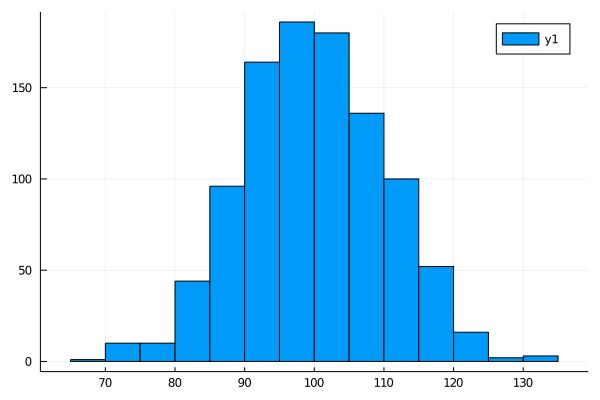

In [4]:
# Simulate 1000 observations from a Normal distribution with a mean of 100 and standard deviation of 10
normalData = rand(Normal(100, 10), 1000)
histogram(normalData)

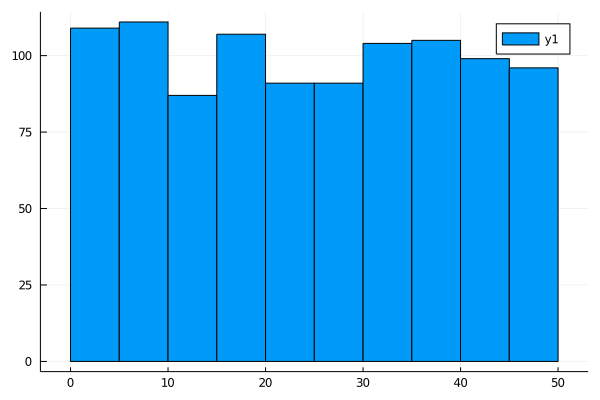

In [5]:
# Simulate 1000 observations from a Uniform distribution with a minimum of 0 and a maximum of 50
uniformData = rand(Uniform(0, 50), 1000)
histogram(uniformData)

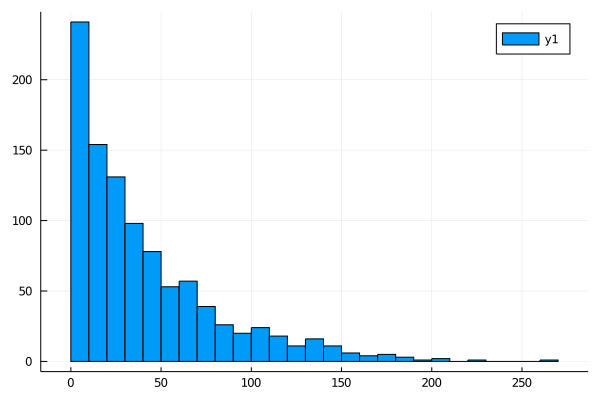

In [6]:
# Simulate 1000 observations from an Exponential distribution with parameter 40
exponentialData = rand(Exponential(40), 1000)
histogram(exponentialData)

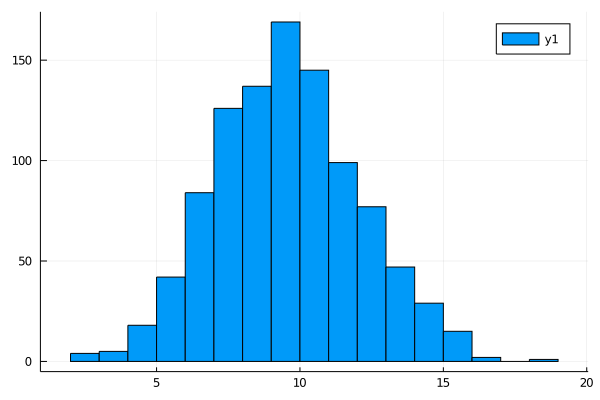

In [7]:
# Simulate 1000 observations from a Binomial distribution with n = 30 and p = 0.3
binomialData = rand(Binomial(30, 0.3), 1000)
histogram(binomialData)

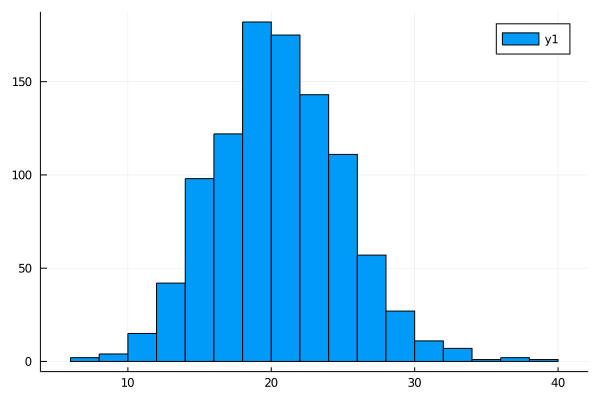

In [8]:
# Simulate 1000 observations from a Poisson distribution with parameter 20
poissonData = rand(Poisson(20), 1000)
histogram(poissonData)

In [9]:
# Next, we will use the fit() function to fit the empirical distribution (i.e. the raw data) to a theoretical distribution.
# Try this first with the normal data.
fit(Normal, normalData)

Normal{Float64}(μ=99.96588544560508, σ=10.211859504301314)

In [10]:
# Try this with the exponential data.
fit(Exponential, exponentialData)

Exponential{Float64}(θ=41.021187733493385)

Now that we have seen all the statistical distributions as well as fitting the empirical distribution to a theoretical one, let's take a look at the statistical functions.

In [11]:
# Load the "mpg" dataset from the "ggplot2" R package
mpg = dataset("ggplot2", "mpg");

In [12]:
# Return the numerical summary of this dataset.
describe(mpg)

,variable,mean,min,median,max,nunique,nmissing
,Symbol,Union…,Any,Union…,Any,Union…,Nothing
1,Manufacturer,,audi,,volkswagen,15,
2,Model,,4runner 4wd,,toyota tacoma 4wd,38,
3,Displ,3.47179,1.6,3.3,7.0,,
4,Year,2003.5,1999,2003.5,2008,,
5,Cyl,5.88889,4,6.0,8,,
6,Trans,,auto(av),,manual(m6),10,
7,Drv,,4,,r,3,
8,Cty,16.859,9,17.0,35,,
9,Hwy,23.4402,12,24.0,44,,


In [13]:
# mean() function from the Statistics package
Statistics.mean(mpg["Cty"])

16.858974358974358

In [14]:
# mean() function from the StatsBase package
StatsBase.mean(mpg["Cty"])

16.858974358974358

In [15]:
# Julia will default to the Statistics package without specification
mean(mpg["Cty"])

16.858974358974358

In [16]:
# We can pass an 'aweights' vector to the mean() function.
A = [10, 20, 30]
w = aweights([0.8, 0.1, 0.1])
mean(A, w)

13.0

In [17]:
# A "frequency" vector is possible too.
A = [10, 20, 30]
f = fweights([80, 10, 10])
mean(A, f)

13.0

In [18]:
# median() function
median(mpg["Cty"])

17.0

In [19]:
# std() function for standard deviation
std(mpg["Cty"])

4.255945678889396

In [20]:
# var() function for variance
var(mpg["Cty"])

18.11307362165732

In [21]:
# quantile() function to return quantiles
quantile(mpg["Cty"], [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1])

7-element Array{Float64,1}:
  9.0
 11.0
 14.0
 17.0
 19.0
 21.0
 35.0

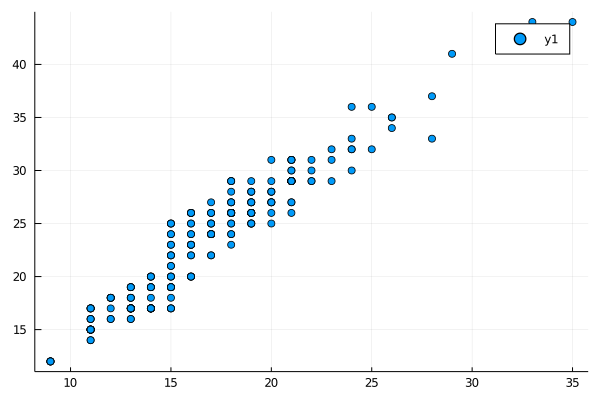

In [22]:
# Use the scatter() function to generate a scatterplot before we return a correlation
scatter(mpg["Cty"], mpg["Hwy"])

In [23]:
# cor() function to return correlation
cor(mpg["Cty"], mpg["Hwy"])

0.9559159136495735

In [24]:
# cov() function to return covariance
cov(mpg["Cty"], mpg["Hwy"])

24.225431935732374

In [25]:
# There are two sampling functions: rand(), and sample().
# rand() uses independent sampling.
# sample() enables features like sampling without replacement.
sample(1:50, 5, replace = false, ordered = true)

5-element Array{Int64,1}:
 21
 29
 35
 46
 50

We will end by illustrating the hypothesis testing functionality from the HypothesisTests library.

In [26]:
# Two-sample t-test example
xbar = 3.2
stddev = 1.2
n = 50
μ0 = 3.5
test = OneSampleTTest(xbar, stddev, n, μ0)
test

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         3.5
    point estimate:          3.2
    95% confidence interval: (2.859, 3.541)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.0833

Details:
    number of observations:   50
    t-statistic:              -1.767766952966368
    degrees of freedom:       49
    empirical standard error: 0.1697056274847714


In [27]:
# Return a one-sided p-value from this test
pvalue(test; tail = :left)

0.04166307987075476